# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [2]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [3]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [4]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

### Answer Linear Regression

When we aim to predict quantitative outputs from available data, we are dealing with a regression task. In this exercise, we are tasked with implementing a linear regression model to determine the best-fitting hyperplane for a given set of training data points. This model is a simple linear combination of parameters $\boldsymbol{\mathrm{\beta}}$ (weights) associated with the corresponding input matrix $\boldsymbol{\mathrm{X}}$.

The code for the linear regression model implementation has already been provided, which gives us the vector of weights $\beta$. The original dataset is first split into training and testing sets, with the former used for model training and the latter for evaluation.

A column of 1's is added to the X matrix, which allows for the calculation of a weight corresponding to the y-intercept. Next, the `lsq` function implements one of the standard techniques for fitting a linear model to the training data, known as the least squares method. Given an input training matrix $\boldsymbol{\mathrm{X}}$ and a target vector $\boldsymbol{\mathrm{y}}$, the coefficients $\boldsymbol{\mathrm{\beta}}$ are computed in a way that minimizes the sum of the squared differences between the observed values and the values predicted by the model. By setting the gradient of the residual sum of squares to zero (to find the minimum), we arrive at the following expression:

$$
\hat{\beta} = (X^TX)^{-1} X^Ty
$$

where $(X^TX)^{-1} X^T$ represents the Moore-Penrose pseudoinverse of $\boldsymbol{\mathrm{X}}$, a matrix particularly useful for solving linear systems that may lack a unique solution or be overdetermined or underdetermined.

In [4]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print("Parameter vector β:\n", beta)


Parameter vector β:
 [[ 152.34779643]
 [ -16.57338609]
 [-254.66343751]
 [ 560.9894609 ]
 [ 278.90965232]
 [-393.45557666]
 [  97.08855335]
 [ -18.9842756 ]
 [ 169.46616165]
 [ 632.96847103]
 [ 114.21833048]]


Once the parameter vector $\boldsymbol{\mathrm{\beta}}$ is known, we can make predictions for a given input matrix $\boldsymbol{\mathrm{X}}$. The `predict` function handles this by calculating:

$$
\hat{y} = X^T\hat{\beta}
$$
 
where $\boldsymbol{\mathrm{X}^T}$ corresponds to the testing data, and $\boldsymbol{\mathrm{\beta}}$ is the previously computed parameter vector. In this case, the matrix `X_with_ones` is already composed of row vectors, so no transposition is required in the code.

Lastly, to facilitate comparison between different models (e.g., incorporating regularization or testing alternative methods), the mean squared error (MSE) can be useful and it is computed using the expression:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [5]:
#CODE ADDED TO THE PROVIDED CODE
# Predict using test data
y_predicted = predict(X_test, beta)

# Return MSE
mse = mse_calc(y_test, y_predicted)

print(f"Linear Regression MSE: {mse:.4f}")

Linear Regression MSE: 2794.5870


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

In [6]:
from linear_regression import *

w = np.ones((X_train.shape[0],))

beta = wlsq(X_train, y_train, w)

ones_test = np.ones((len(X_test), 1))
X_with_ones = np.concatenate((ones_test, X_test), axis=1)

y_pred = np.dot(X_with_ones, beta)

print(y_pred)

[[225.90361745]
 [122.19508185]
 [206.98679522]
 [230.90247225]
 [109.96202416]
 [127.94599697]
 [123.84826395]
 [146.52181459]
 [ 88.9827528 ]
 [140.36999951]
 [204.82939112]
 [173.94924617]
 [122.27111051]
 [212.78573544]
 [174.59773091]
 [112.04466141]
 [203.46579722]
 [169.5801066 ]
 [163.82556572]
 [197.80878193]
 [189.79711878]
 [290.18790978]
 [299.63055432]
 [231.31013144]
 [209.57245912]
 [226.69701524]
 [156.33876468]
 [225.71306496]
 [195.27849356]
 [103.03491298]
 [173.08310958]
 [110.33502923]
 [293.97340987]
 [179.06814759]
 [ 77.55701088]
 [ 84.77346547]
 [257.24228133]
 [166.97380517]
 [117.81605604]
 [149.09724803]
 [163.43506812]
 [179.35362669]
 [158.91444084]
 [155.90543989]
 [141.74041946]
 [121.56757939]
 [174.10130113]
 [103.35553809]
 [133.91878591]
 [ 88.96809795]
 [257.04609851]
 [ 86.01608596]
 [ 64.01560203]
 [177.44755356]
 [196.60331227]
 [132.22884644]
 [ 87.57543376]
 [201.83550997]
 [ 52.90673405]
 [172.67013731]
 [198.11119404]
 [122.24870679]
 [236.00

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [8]:
# Might be needed to run this first, it is not present by default in some environments
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


Accuracy for k=1: 0.5070
Accuracy for k=2: 0.5775
Accuracy for k=3: 0.6268
Accuracy for k=4: 0.6761
Accuracy for k=5: 0.7042
Accuracy for k=6: 0.7324
Accuracy for k=7: 0.7535
Accuracy for k=8: 0.7535
Accuracy for k=9: 0.7606
Accuracy for k=10: 0.7324
Accuracy for k=11: 0.6549
Accuracy for k=12: 0.6549
Accuracy for k=13: 0.6408
Accuracy for k=14: 0.5352
Accuracy for k=15: 0.5282
Accuracy for k=16: 0.5352
Accuracy for k=17: 0.5211
Accuracy for k=18: 0.4859
Accuracy for k=19: 0.4859
Accuracy for k=20: 0.5000


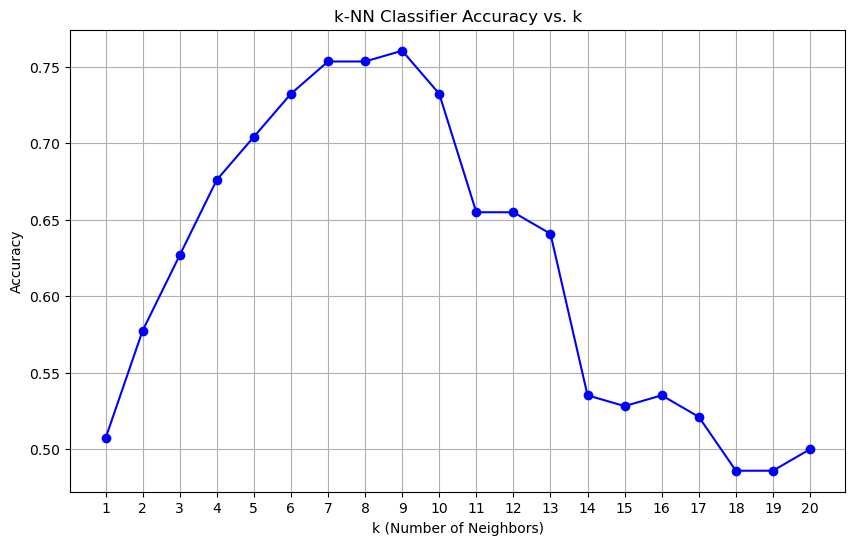

In [7]:
import matplotlib.pyplot as plt
from knn_classification import *

# Normalize the features
X_train_normalized, X_test_normalized = normalize_features(X_train, X_test)

k_vals = range(1, 21)
accuracies = []

for k in k_vals:
    y_pred = knn_classification(X_train_normalized, y_train, X_test_normalized, k)
    acc = get_accuracy(y_test, y_pred)
    accuracies.append(acc)
    print(f'Accuracy for k={k}: {acc:.4f}')

# Plot k-NN Classification Accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_vals, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Classifier Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.grid(True)
plt.show()

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$.

Linear Regression MSE: 2794.5870
k-NN Regression MSE for k=1: 6626.1056
k-NN Regression MSE for k=2: 4441.8239
k-NN Regression MSE for k=3: 3755.7621
k-NN Regression MSE for k=4: 3387.7487
k-NN Regression MSE for k=5: 3354.4825
k-NN Regression MSE for k=6: 3289.1821
k-NN Regression MSE for k=7: 3250.6087
k-NN Regression MSE for k=8: 2985.8281
k-NN Regression MSE for k=9: 2750.7141
k-NN Regression MSE for k=10: 2597.5655
k-NN Regression MSE for k=11: 2688.8908
k-NN Regression MSE for k=12: 2646.6901
k-NN Regression MSE for k=13: 2641.1486
k-NN Regression MSE for k=14: 2700.8099
k-NN Regression MSE for k=15: 2670.8017
k-NN Regression MSE for k=16: 2648.3339
k-NN Regression MSE for k=17: 2689.0456
k-NN Regression MSE for k=18: 2704.9949
k-NN Regression MSE for k=19: 2743.5752
k-NN Regression MSE for k=20: 2835.0372


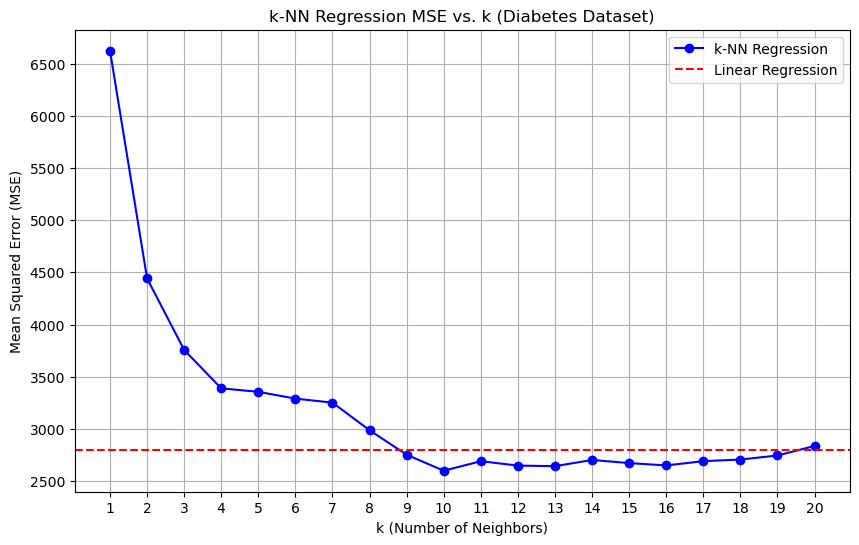

In [8]:
from knn_regression import *

k_vals = range(1, 21)
knn_mses = []

print(f"Linear Regression MSE: {mse:.4f}")

# Normalize the features 
X_train_normalized, X_test_normalized = normalize_features(X_train, X_test)

# Loop through k values and calculate MSE for each k
for k in k_vals:
    y_pred_knn = knn_regression(X_train_normalized, y_train, X_test_normalized, k)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    #mse_knn = mse_calc(y_test, y_pred_knn)
    knn_mses.append(mse_knn)
    print(f'k-NN Regression MSE for k={k}: {mse_knn:.4f}')

# Plot mse for different k values and compare with linear regression
plt.figure(figsize=(10, 6))
plt.plot(k_vals, knn_mses, marker='o', linestyle='-', color='b', label='k-NN Regression')
plt.axhline(y=mse, color='r', linestyle='--', label='Linear Regression')
plt.title('k-NN Regression MSE vs. k (Diabetes Dataset)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.show()

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



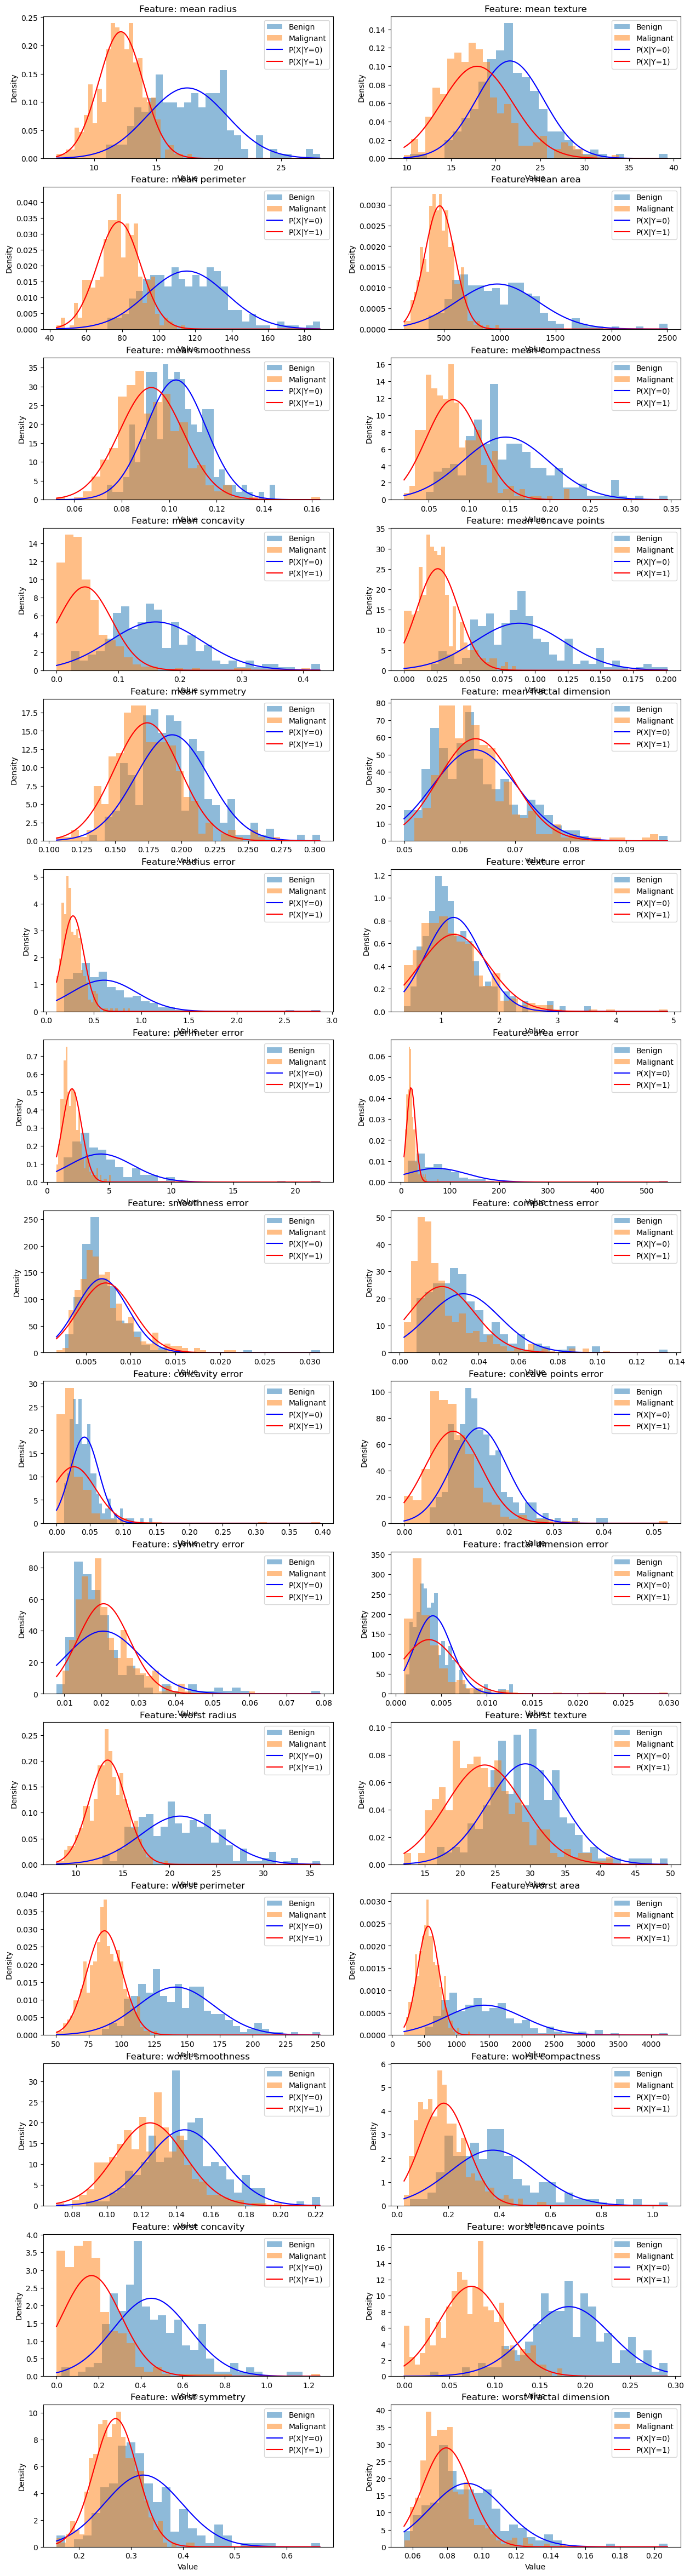

In [9]:
from scipy.stats import norm
from class_conditional_prob import *

X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

n_features = X.shape[1]
n_rows = (n_features + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
axs = axs.ravel()

for i in range(n_features):
    means, stds = class_conditional_prob(X, y, i)
    
    # Plot histograms
    axs[i].hist(X[y == 0, i], bins=30, density=True, alpha=0.5, label='Benign')
    axs[i].hist(X[y == 1, i], bins=30, density=True, alpha=0.5, label='Malignant')
    
    # Plot probability density functions
    x_range = np.linspace(X[:, i].min(), X[:, i].max(), 200)
    axs[i].plot(x_range, norm.pdf(x_range, means[0], stds[0]), label='P(X|Y=0)', color='blue')
    axs[i].plot(x_range, norm.pdf(x_range, means[1], stds[1]), label='P(X|Y=1)', color='red')
    
    axs[i].set_title(f'Feature: {feature_names[i]}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].legend()

Answer to the Question: The features "worst perimeter" and "worst radius" provide the best discrimination between the Benign and Malignant classes. It can be seen that the histograms for these features show clear separation between the two classes. There is minimal overlap between the distribution of the data, and the probability density curves. A p-test (although not shown in the code) also shows that the difference between the distribution of the two classes for these features is statistically significant, along with other features such as "mean perimeter", "mean radius" and "worst concave points". However, it is worth mentioning that these features are strongly correlated since radius determines the perimeter, hence the similarity of the distributions for these features.